In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly
import geopandas as gpd
import geodatasets

In [2]:
data = pd.read_csv(r"data\Dog Population by Country.csv")
population_data = pd.read_csv(r"data\World Population by country 2024.csv")
#data_link = https://worldostats.com/country-stats/dog-population-by-country/
#popul_link = https://www.kaggle.com/datasets/dataanalyst001/world-population-by-country-2024

#DROP OUTLIERS
data = data[data["Country"] != 'Montenegro']
new_row = pd.DataFrame([{"Country": "Australia", "Estimated Dog Population": "6000000"}])
data = pd.concat([data, new_row], ignore_index=True)


data['Estimated Dog Population'] = pd.to_numeric(
    data['Estimated Dog Population'].str.replace(',', ''),  # remove commas
    errors='coerce'  # turn invalid values into NaN
)
country_name_fixes = {
    "Swaziland": "Eswatini",
    "Iran": "Iran, Islamic Republic of",
    "Democratic Republic of Congo": "Democratic Republic of the Congo",
    "Tanzania": "United Republic of Tanzania",
    "South Korea": "Korea, Republic of",
    "Vietnam": "Viet Nam",
    "Ivory Coast": "Côte d'Ivoire",
    "Kosovo": "Kosovo",
    "Turkey": "Türkiye",
    "United States of America": "United States",
    "Czech Republic": "Czechia",
    "United States": "United States of America"
}



data['Country'] = data['Country'].replace(country_name_fixes)
population_data['Country'] = population_data['Country'].replace(country_name_fixes)
data["Estimated Dog Population"]
full_table = data.merge(population_data, on='Country', how='left')
full_table['Dog Population per Capita'] = full_table['Estimated Dog Population'] / full_table['Population 2024']
#print(full_table.head())
#print(data.head())
#print(population_data)
#print(data.shape)

In [3]:
world = gpd.read_file("data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")
merged = world.merge(data, how='left', left_on='NAME', right_on='Country')
merged_per_capita = world.merge(full_table, how='left', left_on='NAME', right_on='Country')
#print(merged.head())

(177, 171)


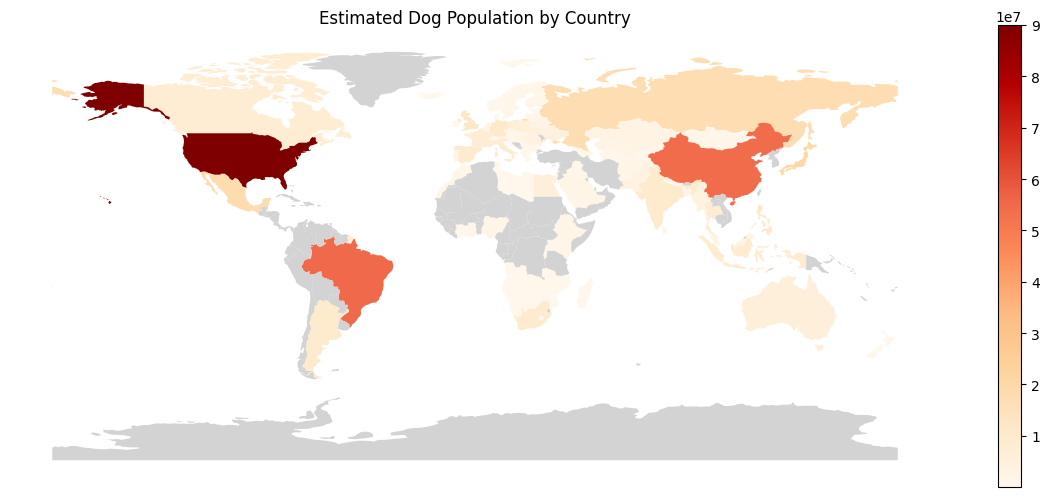

In [4]:
fig, ax = plt.subplots(figsize=(15, 6))
merged.plot(
    column='Estimated Dog Population',
    ax=ax,
    legend=True,
    cmap='OrRd',
    missing_kwds={"color": "lightgrey", "label": "No data"}
)
print(merged.shape)

plt.title("Estimated Dog Population by Country")
plt.axis('off')
plt.show()

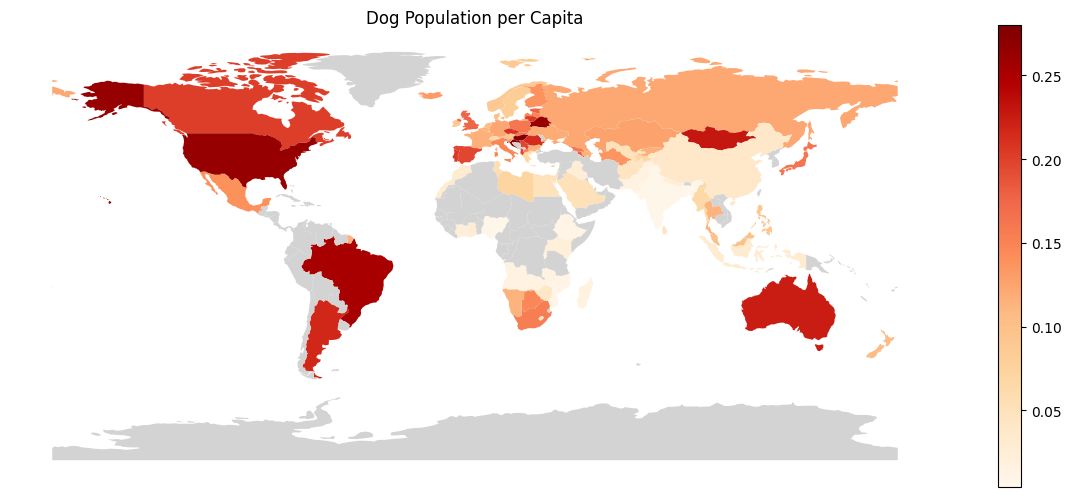

In [5]:
fig, ax = plt.subplots(figsize=(15, 6))
merged_per_capita.plot(
    column='Dog Population per Capita',
    ax=ax,
    legend=True,
    cmap='OrRd',
    missing_kwds={"color": "lightgrey", "label": "No data"}
)
plt.title("Dog Population per Capita")
plt.axis('off')
plt.show()

In [6]:
import pycountry

valid_countries = [country.name for country in pycountry.countries]
invalid_countries = set(data['Country'].unique()) - set(valid_countries)

print("Countries not recognized by the map:", invalid_countries)

Countries not recognized by the map: {'Kosovo', 'United Republic of Tanzania', 'Democratic Republic of the Congo', 'United States of America', 'Russia'}


In [7]:
sorted_by_capita = full_table.sort_values(by='Dog Population per Capita', ascending=False).loc[:,['Country', 'Dog Population per Capita']]